Name : Chathumini B.G.D.T.

Index Number : 190107T

Github Repo:
https://github.com/dulmi-19/Image-Processing-and-Machine-Vision

Text(0.5, 0, 'z')

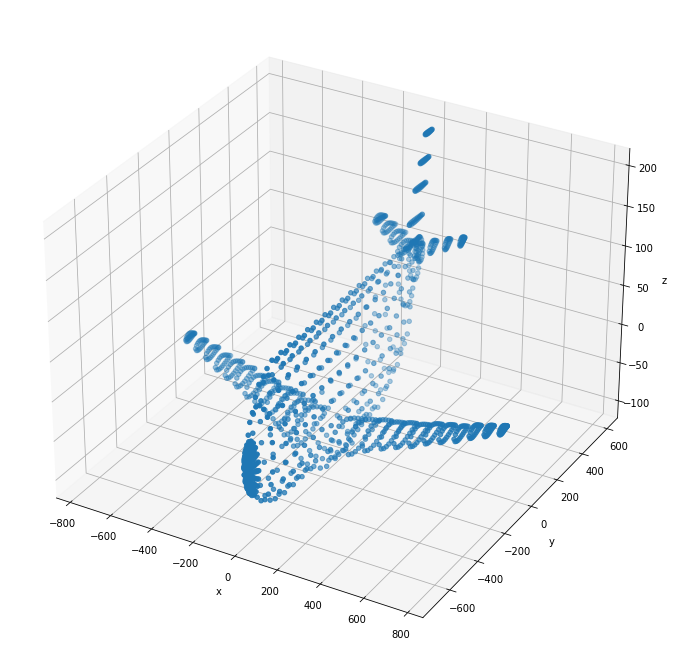

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData, PlyElement

pcd = PlyData.read('airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1, -1), pcd['vertex']['y'].reshape(1, -1), pcd['vertex']['z'].reshape(1, -1)), axis = 0)
points = points - np.mean(points, axis = 1).reshape(3,1)

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[0,:], points[1,:], points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

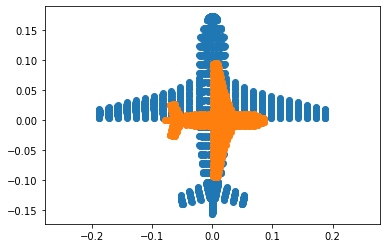

In [4]:
ones =np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis = 0)

R =np.array([[1,0,0],[0,1,0],[0,0,1]])
K =np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1=K @ np.concatenate((R,t),axis=1)

R=np.array([[0,1,0],[1,0,0],[0,0,1]])
K=np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])

P2=K @ np.concatenate((R,t),axis=1)

x1=P1@X
x2=P2@X
x1=x1/x1[2,:]
x2=x2/x2[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis("equal")
plt.show()

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread("earrings.jpg",cv.IMREAD_COLOR)
assert im is not None

hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

w=5
kernel = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw , cv.MORPH_CLOSE , kernel)

retval , labels , stats , centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z = 720
f = 8
for i , s in enumerate(stats):
    if i != 0:
        print('Item' , i , ',area in pixels = ', s[4])
        print('Item' , i , ',area in mm^2 = ', s[4](2.2e-3)2(z*z)/(f*f))

cv.namedWindow("Images")
cv.imshow("Images" , im)
cv.waitKey(0)
cv.imshow("Images" , hsv[:,:,1])
cv.waitKey(0)
cv.imshow("Images" , bw)
cv.waitKey(0)
cv.imshow("Images" , opened)
cv.waitKey(0)
cv.imshow("Images" , colormapped)
cv.waitKey(0)
cv.destroyAllWindows()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1188996485.py, line 23)

In [ ]:
im=cv.imread("earrings.jpg",cv.IMREAD_COLOR)
im1=im.copy()
assert im is not None

hsv=cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw=cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

w=5
kernal=np.ones((w,w),np.uint8)
opened=cv.morphologyEx(bw,cv.MORPH_CLOSE,kernal)

retval,labels,stats,centroids=cv.connectedComponentsWithStats(bw)
colormapped=cv.applyColorMap((labels/np.amax(labels)*255).astype("uint8"),cv.COLORMAP_PARULA)

Z=720
f=8
for i,s in enumerate(stats):
    if i!=0:
        print("Items",i,", area in pixels =",s[4])
        print("Items",i,", area in mn^2 =",s[4](2.2e-3)2(Z*Z)/(f*f))
        im1=cv.rectangle(im1,(s[0],s[1]),(s[0]+s[2],s[1]+s[3]),(0,0,0),2)

cv.namedWindow("Images")
cv.imshow("Images",im)
cv.waitKey(0)
cv.imshow("Images",hsv[:,:,1])
cv.waitKey(0)
cv.imshow("Images",bw)
cv.waitKey(0)
cv.imshow("Images",opened)
cv.waitKey(0)
cv.imshow("Images",colormapped)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax=plt.subplots(1,6,figsize=(20,20))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(hsv[:,:,1], cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(bw, cv.COLOR_BGR2RGB))
ax[4].imshow(cv.cvtColor(opened, cv.COLOR_BGR2RGB))
ax[5].imshow(cv.cvtColor(colormapped, cv.COLOR_BGR2RGB))

plt.show()

item 1 area in pixels= 59143
item 1 area in pixels= 2318.642172
item 2 area in pixels= 59211
item 2 area in pixels= 2321.3080440000003


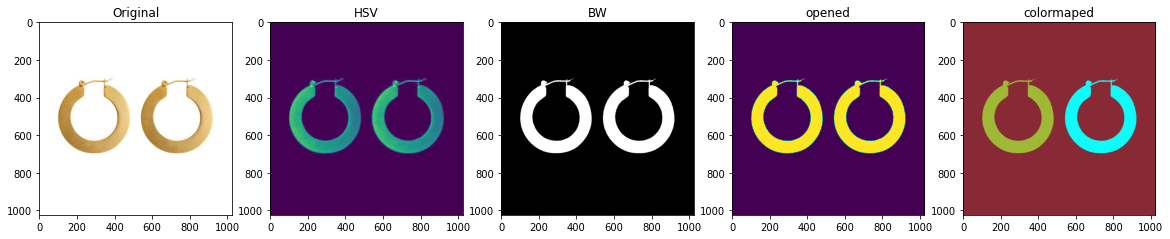

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im=cv.imread(r'earrings.jpg',cv.IMREAD_COLOR)
assert im is not None

hsv=cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw=cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

w=5
kernel=np.ones((w,w),np.uint8)
opened=cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval,labels,stats,centroids=cv.connectedComponentsWithStats(bw)
colormaped=cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z=720
f=8
for i,s in enumerate(stats):
  if i !=0:
    print("item",i,'area in pixels=',s[4] )
    print("item",i,'area in pixels=',s[4]*(2.2e-3)**2*(z**2)/(f*f))



fig,ax = plt.subplots(1,5,figsize=(20,20))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].imshow(hsv[:,:,1])
ax[1].set_title('HSV')
ax[2].imshow(bw,cmap='gray')
ax[2].set_title('BW')
ax[3].imshow(opened)
ax[3].set_title('opened')
ax[4].imshow(colormaped)
ax[4].set_title('colormaped')
plt.show()


